In [20]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.19.0


In [18]:
import tensorflow as tf

# List all physical devices
gpus = tf.config.list_physical_devices('GPU')

if gpus:
    print(f"✅ TensorFlow is using the GPU: {gpus}")
else:
    print("⚠️ No GPU found. TensorFlow is running on CPU.")

⚠️ No GPU found. TensorFlow is running on CPU.


In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os


In [2]:
train_dir = r"C:\Users\LENOVO\Downloads\IDP\IDP\Cotton Disease\train"
val_dir = r"C:\Users\LENOVO\Downloads\IDP\IDP\Cotton Disease\val"
test_dir = r"C:\Users\LENOVO\Downloads\IDP\IDP\Cotton Disease\test"

num_classes = 4  # Number of categories
batch_size = 32
img_size = (224, 224)


In [3]:
train_datagen = ImageDataGenerator(rescale=1.0/255, rotation_range=30, horizontal_flip=True, zoom_range=0.2)
val_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=img_size, batch_size=batch_size, class_mode="categorical")
val_generator = val_datagen.flow_from_directory(val_dir, target_size=img_size, batch_size=batch_size, class_mode="categorical")
test_generator = test_datagen.flow_from_directory(test_dir, target_size=img_size, batch_size=batch_size, class_mode="categorical", shuffle=False)


Found 1951 images belonging to 4 classes.
Found 253 images belonging to 4 classes.
Found 106 images belonging to 4 classes.


In [5]:
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Custom Classification Head
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=output)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 33s 0us/step


In [6]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])


In [21]:
history = model.fit(train_generator, validation_data=val_generator, epochs=50)


Epoch 1/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - accuracy: 0.4209 - loss: 1.2929 - val_accuracy: 0.3083 - val_loss: 1.3441
Epoch 2/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.3927 - loss: 1.2970 - val_accuracy: 0.3083 - val_loss: 1.3245
Epoch 3/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.4519 - loss: 1.2512 - val_accuracy: 0.3202 - val_loss: 1.3063
Epoch 4/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.4340 - loss: 1.2628 - val_accuracy: 0.3123 - val_loss: 1.2998
Epoch 5/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.4327 - loss: 1.2411 - val_accuracy: 0.3083 - val_loss: 1.3067
Epoch 6/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.4299 - loss: 1.2533 - val_accuracy: 0.3202 - val_loss: 1.2978
Epoch 7/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 0.4482 - loss: 1.2437 - val_accuracy: 0.3241 - val_loss: 1.2820
Epoch 8/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.4383 - loss: 1.2252 - val_accuracy: 0.3241 - val_l

In [23]:
model.save("resnet50_cotton_disease_model.h5")


In [24]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.6405 - loss: 1.0050
Test Accuracy: 0.60


In [25]:
y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_generator.classes

print(classification_report(y_true, y_pred, target_names=list(test_generator.class_indices.keys())))


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step
                       precision    recall  f1-score   support

 diseased cotton leaf       0.85      0.44      0.58        25
diseased cotton plant       0.46      0.96      0.62        28
    fresh cotton leaf       0.76      1.00      0.87        26
   fresh cotton plant       0.00      0.00      0.00        27

             accuracy                           0.60       106
            macro avg       0.52      0.60      0.52       106
         weighted avg       0.51      0.60      0.51       106



c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


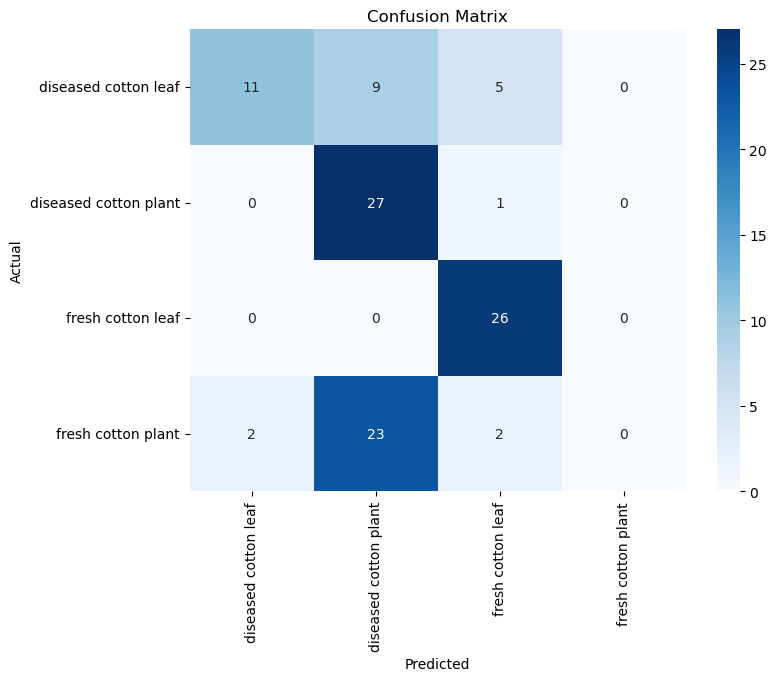

In [26]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


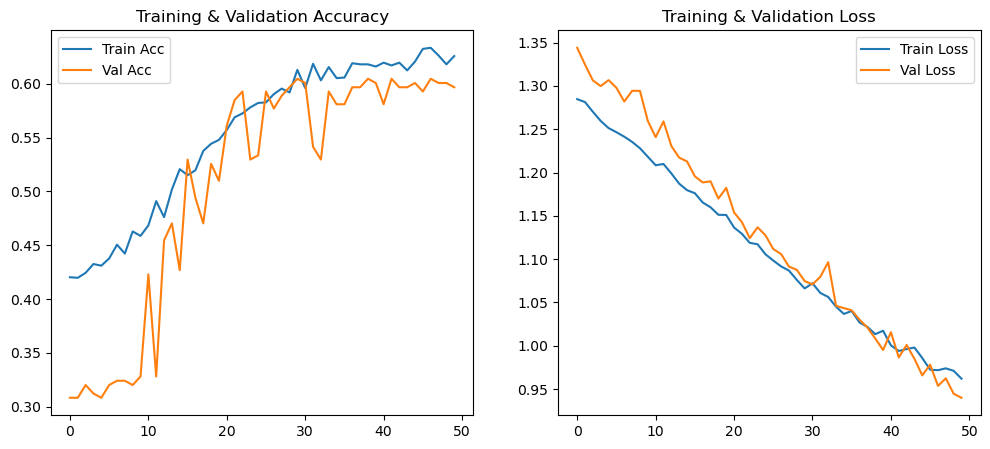

In [27]:
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Training & Validation Accuracy')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Training & Validation Loss')

plt.show()


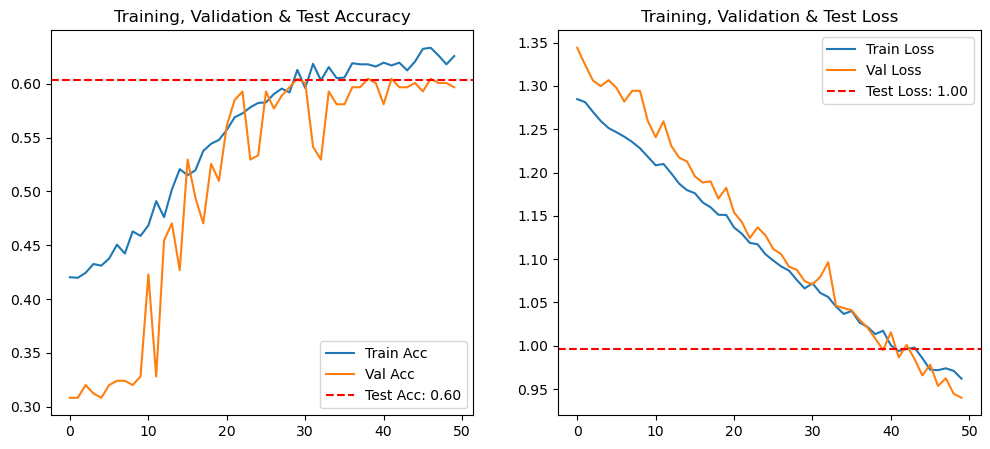

In [28]:
# First, evaluate on test set
test_loss, test_acc = model.evaluate(test_generator, verbose=0)

plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.axhline(y=test_acc, color='r', linestyle='--', label=f'Test Acc: {test_acc:.2f}')
plt.legend()
plt.title('Training, Validation & Test Accuracy')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label=f'Test Loss: {test_loss:.2f}')
plt.legend()
plt.title('Training, Validation & Test Loss')

plt.show()


In [29]:
from tensorflow.keras.preprocessing import image

sample_path = os.path.join(test_dir, list(test_generator.class_indices.keys())[0], os.listdir(os.path.join(test_dir, list(test_generator.class_indices.keys())[0]))[0])
img = image.load_img(sample_path, target_size=img_size)
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
predicted_class = list(test_generator.class_indices.keys())[np.argmax(prediction)]
print(f"Predicted Class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Predicted Class: diseased cotton plant
